## Trabalho 2 - ECDB

### Grupo 6
Joana Araújo pg49836

Mariana Silva pg45966

Tiago Silva pg49849

## CYP P450 2C19 Inhibition

### Dataset Description: 

The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, the CYP P450 2C9 plays a major role in the oxidation of both xenobiotic and endogenous compounds.

### Task Description: 

Binary Classification. Given a drug SMILES string, predict CYP2C9 inhibition.

### Dataset Statistics: 

12,513 drugs.

### References:

[1] Veith, Henrike et al. “Comprehensive characterization of cytochrome P450 isozyme selectivity across chemical libraries.” Nature biotechnology vol. 27,11 (2009): 1050-5.

### Import libraries

In [67]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Leitura de dados e metadados

In [68]:
# lendo dados usando pandas
data_cyp2c19 = pd.read_csv("cyp2c19_features.csv", sep=',')
# lendo metadados
meta_cyp2c19 = pd.read_csv("cyp2c19.csv", sep = ",")

data_cyp2c19 = data_cyp2c19.transpose()

In [69]:
data_cyp2c19

,0,1,2,3,4,5,6,7,8,9,...,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512
MaxEStateIndex,11.609395,12.610409,6.126257,5.719940,12.040634,12.762343,13.082813,12.850702,5.838888,11.219078,...,13.098029,12.848059,12.734144,12.762526,13.015119,12.346902,13.390758,12.817440,13.179767,10.715530
MinEStateIndex,0.000000,-3.973681,0.660427,-0.219974,-0.208718,-0.533851,-0.044883,-0.112825,0.144975,-0.045417,...,-0.872460,-0.828768,-0.900688,-0.822066,-0.797633,-0.801800,-1.019880,-0.985371,-1.161112,-0.480844
MaxAbsEStateIndex,11.609395,12.610409,6.126257,5.719940,12.040634,12.762343,13.082813,12.850702,5.838888,11.219078,...,13.098029,12.848059,12.734144,12.762526,13.015119,12.346902,13.390758,12.817440,13.179767,10.715530
MinAbsEStateIndex,0.000000,0.072387,0.660427,0.075509,0.006714,0.182110,0.018472,0.000000,0.144975,0.045417,...,0.057204,0.030949,0.013127,0.029437,0.004523,0.024123,0.162294,0.131139,0.077392,0.139962
qed,0.884168,0.720978,0.756902,0.605920,0.728361,0.757037,0.457249,0.506101,0.396056,0.723254,...,0.783379,0.739843,0.576107,0.673255,0.742815,0.682518,0.455270,0.406549,0.772281,0.773508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiocyan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiophene,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_unbrch_alkane,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
print(data_cyp2c19.shape)
print(meta_cyp2c19.shape)

(208, 12513)
(12513, 3)


In [71]:
data_cyp2c19.describe()

,0,1,2,3,4,5,6,7,8,9,...,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,208.000000,...,2.080000e+02,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,2.080000e+02,208.000000
mean,285.293947,594.135136,149.633281,6.996301e+04,2409.896050,1.118924e+04,1.275478e+06,2.567800e+04,3.305384e+04,12.792086,...,1.334143e+04,1542.713131,1389.510119,250.371908,1369.217066,144.028901,6.194609e+04,3868.259849,4.912943e+03,51.159877
std,3920.131338,8337.050179,1990.193539,1.008752e+06,34541.057518,1.611265e+05,1.839489e+07,3.700266e+05,4.764367e+05,74.952069,...,1.921737e+05,22054.020620,19834.368549,3431.237636,19552.658280,1914.920672,8.931463e+05,55582.514045,7.062973e+04,594.949815
min,-2.458013,-3.973681,-2.130000,-2.840000e+00,-3.290000,-3.350000e+00,-2.660000e+00,-2.391284e+00,-3.660000e+00,-2.031266,...,-2.670000e+00,-2.470053,-3.375673,-2.484160,-2.473704,-2.468199,-2.974486e+00,-2.707991,-3.014487e+00,-2.221160
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.243448,9.105506e-02,4.180207e-01,7.363840e-01,4.556980e-01,0.000000,...,4.517977e-01,0.000000,0.000000,0.000000,0.000000,0.000000,2.336322e-01,0.000000,0.000000e+00,0.155994
75%,5.484474,6.942803,3.807449,5.768235e+00,7.109797,6.923737e+00,9.584585e+00,9.208467e+00,8.126170e+00,3.828148,...,7.992436e+00,5.897656,6.065397,5.032875,5.607287,5.000000,7.396165e+00,6.942803,6.014912e+00,5.918043
max,56545.023000,120248.980000,28703.373000,1.454845e+07,498172.120000,2.323816e+06,2.652949e+08,5.336621e+06,6.871286e+06,934.531200,...,2.771585e+06,318080.120000,286068.300000,49492.777000,282004.780000,27620.440000,1.288116e+07,801636.250000,1.018652e+06,8571.555000


In [72]:
data_cyp2c19.transpose().describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.0,...,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,11.301366,-0.878665,11.301366,0.191314,0.613183,355.661700,335.440396,355.260983,130.888995,0.0,...,0.108767,0.078398,0.012387,0.003516,0.011508,0.033725,0.000160,0.065692,0.121793,0.041956
std,2.660753,1.453325,2.660753,0.222518,0.190299,105.240375,99.547443,105.127283,39.397215,0.0,...,0.332943,0.278734,0.113464,0.059197,0.109617,0.194590,0.012642,0.255064,0.774348,0.206003
min,2.248446,-7.603764,2.248446,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.976106,-1.039330,10.976106,0.043847,0.484477,292.364000,275.145000,292.124540,106.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.262559,-0.394431,12.262559,0.118089,0.632687,348.478000,328.264000,348.169860,128.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.911008,-0.063559,12.911008,0.234632,0.772393,409.511000,386.258000,409.146030,150.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,2.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,3.000000


In [73]:
meta_cyp2c19.dtypes

ids       float64
smiles     object
Y           int64
dtype: object

In [74]:
meta_cyp2c19.describe(include="all")

,ids,smiles,Y
count,1.251300e+04,12513,12513.000000
unique,NaN,12513,NaN
top,NaN,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,NaN
freq,NaN,1,NaN
mean,6.134883e+06,NaN,0.463838
std,1.787283e+07,NaN,0.498710
min,1.080000e+02,NaN,0.000000
25%,1.324253e+06,NaN,0.000000
50%,3.233964e+06,NaN,0.000000
75%,4.004272e+06,NaN,1.000000


In [75]:
meta_cyp2c19.groupby("Y").size()

Y
0    6709
1    5804
dtype: int64

In [76]:
data_cyp2c19.isnull().sum().sum()

0

In [77]:
meta_cyp2c19.isnull().sum()

ids       0
smiles    0
Y         0
dtype: int64

### Exploração Gráfica

<AxesSubplot:ylabel='Inhibition'>

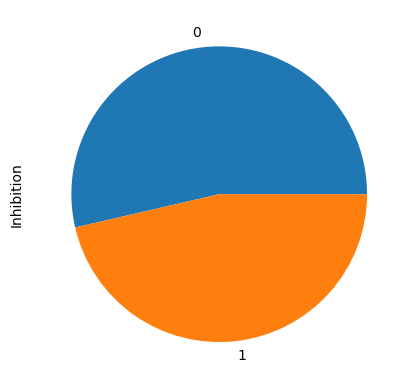

In [78]:
meta_cyp2c19.groupby("Y").size().plot.pie(ylabel= "Inhibition")

### Analise Estatistica Univariada

In [80]:
# genes diferencialmente expressos - variavel MDR
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import preprocessing

# fclassif - ANOVA ou t-test (neste caso t-test pois mdr tem apenas duas classes)
# seleciona genes com menor p-value (os 10% com menor valor)
selector = SelectPercentile(f_classif, percentile=10)

output_Y= meta_cyp2c19.values[:,2]

selector.fit_transform(data_cyp2c19, output_Y)
genes_de = np.where(selector.pvalues_ <0.01)
print(data_cyp2c19.columns[genes_de])

ValueError: Found input variables with inconsistent numbers of samples: [208, 12513]